### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [1]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### 2. Se pide:

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

## First things first: Import the necessary libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Import math to round numbers
import math

# Exercise 1

### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [3]:
#Import svm
from sklearn import svm

#Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Import metrics
from sklearn.metrics import r2_score, mean_absolute_error

### Choose Target and Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# For non-linear regression only the numerical values will be selected from the data
# X --> Features
X = df.iloc[:, :-1]

# y --> Target
y = df['Price']

# Split the data (Train/Test split)
# Seed
seed = 30
# test_size
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('-----')
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('-----')
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X.shape: (5000, 6)
y.shape: (5000,)
-----
X_train.shape: (4000, 6)
y_train.shape: (4000,)
-----
X_test.shape: (1000, 6)
y_test.shape: (1000,)


### Remember that for non-linear regression with PolynomialFeature, it is mandatory to transform the sets into Polynoms

X_poly.shape: (4000, 28)
y_pred.shape: (4000,)
Score: 1.0


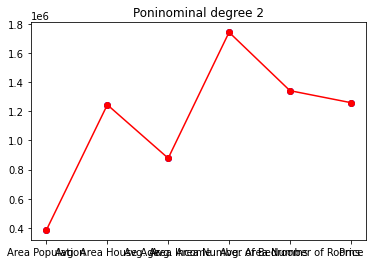

In [15]:
# This is a first test to understand the syntax

# Degree
degree = 2

# Assign the model to a variable
pol_model = PolynomialFeatures(degree)

# Transform the train set
X_poly = pol_model.fit_transform(X_train, y_train)

######
print('X_poly.shape:', X_poly.shape)

#Assign linear regression to a variable
lin_reg = LinearRegression()
# Train the model
lin_reg.fit(X_poly, y_train)
y_pred = lin_reg.predict(X_poly)

print('y_pred.shape:', y_pred.shape)
print('Score:', r2_score(y_train, y_pred))

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))

plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

### Now, let's create the `for loop` to see the model's performance

In [17]:
# Create a range of degrees to iterate through
degrees= [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Generate the for loop 
for i in range(len(degrees)):
    print('###########')
    print('RESULT WITH DEGREE', str(degrees[i]))

    #Here we assign the model with degree as parameter
    polynomial_model = PolynomialFeatures(degrees[i])
    X_poly = polynomial_model.fit_transform(X_train, y_train)
    
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)

    print('y_pred shape:', y_pred.shape)
    print('Score:', r2_score(y_train, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))

'''
                --- In case you want to plot the results ---

plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()
'''

###########
RESULT WITH DEGREE 2
y_pred shape: (4000,)
Score: 1.0
###########
RESULT WITH DEGREE 3
y_pred shape: (4000,)
Score: 0.999929905680792
###########
RESULT WITH DEGREE 4
y_pred shape: (4000,)
Score: 0.9998652756915681
###########
RESULT WITH DEGREE 5
y_pred shape: (4000,)
Score: 0.9990723948797086
###########
RESULT WITH DEGREE 6
y_pred shape: (4000,)
Score: 0.9918075698193259
###########
RESULT WITH DEGREE 7
y_pred shape: (4000,)
Score: 0.9453218198325887
###########
RESULT WITH DEGREE 8
y_pred shape: (4000,)
Score: 0.9047747677693764
###########
RESULT WITH DEGREE 9
y_pred shape: (4000,)
Score: 0.8832768246061221
###########
RESULT WITH DEGREE 10
y_pred shape: (4000,)
Score: 0.9205972803452424


'\n    plt.scatter(X_train_to_show, y_train_to_show, color=\'b\')\nX_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))\nplt.plot(X_train_to_show, y_pred, color=\'red\')\nplt.scatter(X_train_to_show, y_pred, color=\'red\')\nplt.title("Poninominal degree " + str(degree))\nplt.show()\n'

## As the number of polynoms increases, the model tends to be less precise.

- It is also not advisable to train a model that fits perfectly on our test set because it would not predict accurately other datasets.

- For this dataset, 2 seems to be the best degree for the dataset.

# Exercise 2
1. Change all the data from 'Avg. Area Number of Bedrooms' to integers
    
- If float is .5, it will round down to the next full integer

In [5]:
# Use math.floor to round down
new_df_col = []
for i in df['Avg. Area Number of Bedrooms']:
    i = math.floor(i)
    new_df_col.append(i)
df['Avg. Area Number of Bedrooms'] = new_df_col

2. treat the new column as labels

In [6]:
le = LabelEncoder()
bedroom_num_encoded = le.fit_transform(df['Avg. Area Number of Bedrooms'])
bedroom_num_encoded
list(le.classes_)

[2, 3, 4, 5, 6]

Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué?

¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target?

### Use all the numerical columns one by one and use SVM(SVC) to classify the modified column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Training models with one feature at a time
- First with LinearSVC
- Later with RBF Kernel

In [34]:
# WITH LINEAR SVM
# ----------------

# Define a list with all features
features_list = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

#SVM Parameters
C = 100000
gamma = 10

# Assign a variable for Linear SVM
clf = svm.LinearSVC(C=C)

for pos, feature in enumerate(features_list):
    # X --> Feature
    X = np.array(df[feature]).reshape(-1, 1)

    # y --> Target
    y = bedroom_num_encoded

    # ----------------------

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=66)

    # Train the model 
    clf.fit(X_train, y_train)

    # Display the score
    print('Score of the feature', str(features_list[pos]), clf.score(X_test, y_test))
    print('-------------')

Score of the feature Avg. Area Income 0.29125
-------------
Score of the feature Avg. Area House Age 0.16675
-------------
Score of the feature Avg. Area Number of Rooms 0.29125
-------------
Score of the feature Area Population 0.298
-------------
Score of the feature Price 0.16675
-------------


In [31]:
# Define a list with all features
features_list = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

#SVM Parameters
C = 1000
gamma = 10

# Assign a variable for Linear SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)

for pos, feature in enumerate(features_list):
    # X --> Feature
    X = np.array(df[feature]).reshape(-1, 1)

    # y --> Target
    y = bedroom_num_encoded

    # ----------------------

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=66)

    # Train the model 
    clf.fit(X_train, y_train)

    # Display the score
    print('Score of the', str(features_list[pos]), 'feature:', clf.score(X_test, y_test))
    print('-------------')

Score of the Avg. Area Income feature: 0.29675
-------------
Score of the Avg. Area House Age feature: 0.29575
-------------
Score of the Avg. Area Number of Rooms feature: 0.297
-------------
Score of the Area Population feature: 0.29975
-------------
Score of the Price feature: 0.298
-------------


## Training all features with Linear SVM

In [35]:
# new_df is the DataFrame with only numerical values
new_df = df.iloc[:, :-1]

# Define a C value for SVC
C = 1000

clf = svm.LinearSVC(C=C) 

# Define features and target
    # X --> Features
X = new_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']]

    # y --> Target
y = bedroom_num_encoded

# Split the data
test_size = 0.2
seed = 70

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
#Train the model
clf.fit(X_train, y_train)

# See the score on the train set
print('Score:', clf.score(X_train, y_train))

# See the score on the test set
print('Score:', clf.score(X_test, y_test))

Score: 0.30275
Score: 0.297


## Training all features with SVM with RBF kernel

In [36]:
# SVM Parameters
C = 1000
gamma = 10

# rbf -- Radial Basis Function

svm_rbf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
svm_rbf.fit(X_train, y_train)
print('Score with SVM trained with RBF kernel:', svm_rbf.score(X_test, y_test))

Score with SVM trained with RBF kernel: 0.297


# Conclusions

After trying both linear and rbf kernel SVM to predict our target, the score has been always around 0.297